In [1]:
from modules.helpers import load_data
from alive_progress import alive_it
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Learning

In [2]:
(train_x, train_y), (test_x, test_y) = load_data('linear-reg')

In [3]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(train_x, train_y)

# Use the model for prediction
predictions = model.predict(test_x)

# Choosing the Threshold

In [4]:
steps = 1000
ths = []
precs = []
recs = []
accs = []

for i in alive_it(range(1, steps + 1), force_tty=True, max_cols=120):
    th = i / steps
    cut_pred = (predictions >= th)
    ths.append(th)
    accs.append(accuracy_score(cut_pred, test_y))
    precs.append(precision_score(cut_pred, test_y))
    recs.append(recall_score(cut_pred, test_y))

|████████████████████████████████████████| 1000/1000 [100%] in 6.2s (160.11/s)                                          


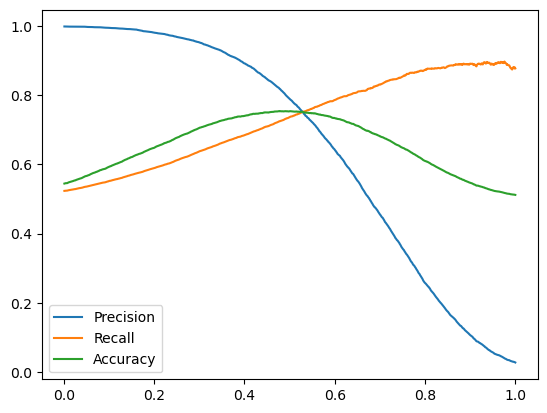

In [5]:
plt.plot(ths, precs, label='Precision')
plt.plot(ths, recs, label='Recall')
plt.plot(ths, accs, label='Accuracy')
plt.legend()
plt.show()

In [6]:
for i in range(len(ths)):
    if accs[i] > 0.7535:
        print(f'- Threshold: {ths[i]:.3f} | Accuracy: {accs[i]:.3f} | Precision: {precs[i]:.3f} | Recall: {recs[i]:.3f}')

- Threshold: 0.476 | Accuracy: 0.754 | Precision: 0.821 | Recall: 0.723
- Threshold: 0.477 | Accuracy: 0.754 | Precision: 0.820 | Recall: 0.724
- Threshold: 0.479 | Accuracy: 0.754 | Precision: 0.817 | Recall: 0.725
- Threshold: 0.480 | Accuracy: 0.754 | Precision: 0.816 | Recall: 0.725
- Threshold: 0.481 | Accuracy: 0.754 | Precision: 0.814 | Recall: 0.726
- Threshold: 0.489 | Accuracy: 0.754 | Precision: 0.804 | Recall: 0.730
- Threshold: 0.490 | Accuracy: 0.754 | Precision: 0.803 | Recall: 0.731
- Threshold: 0.491 | Accuracy: 0.754 | Precision: 0.801 | Recall: 0.732
- Threshold: 0.500 | Accuracy: 0.754 | Precision: 0.790 | Recall: 0.737
- Threshold: 0.501 | Accuracy: 0.754 | Precision: 0.788 | Recall: 0.737
- Threshold: 0.502 | Accuracy: 0.754 | Precision: 0.787 | Recall: 0.738


In [7]:
th = 0.500

We choose this threshold as it has the maximum accuracy and recall while maintaining a high precision.

# Model Evaluation

In [8]:
cut_pred = (predictions >= th)
print(classification_report(test_y, cut_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      7069
           1       0.74      0.79      0.76      7070

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



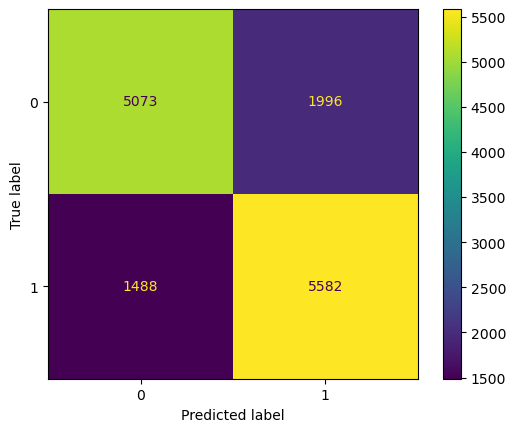

In [9]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(test_y, cut_pred)
    )
disp.plot()
plt.show()